In [1]:
import tensorflow as tf
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
img_height, img_width, img_channels = 180, 180, 3
batch_size=32
training="C:\\Users\\agnes\\Documents\\apziva_ai_residency\\project4\\data\\images\\training"
testing="C:\\Users\\agnes\\Documents\\apziva_ai_residency\\project4\\data\\images\\testing"
loading_dataste_seed = 0

In [3]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    training,
    validation_split=0.2,
    subset="training",
    seed=loading_dataste_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

Found 2392 files belonging to 2 classes.
Using 1914 files for training.


In [4]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    training,
    validation_split=0.2,
    subset="validation",
    seed=loading_dataste_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

Found 2392 files belonging to 2 classes.
Using 478 files for validation.


In [5]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    testing,
    seed=loading_dataste_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

Found 597 files belonging to 2 classes.


In [6]:
classes = train_data.class_names
shape = (img_height, img_width, img_channels)
data = (train_data, val_data, test_data)

In [7]:
train_data, val_data, test_data = data

In [9]:
inputs = Input(shape= shape)
pretrained_EfficientNetV2B1_model = tf.keras.applications.EfficientNetV2B1(
    include_top=False,
    classes=len(classes),
    classifier_activation='softmax',
    include_preprocessing=True,
)
for layer in pretrained_EfficientNetV2B1_model.layers:
    layer.trainable = False
    layer1 = pretrained_EfficientNetV2B1_model(inputs)
    layer2 = Flatten()(layer1)
    layer3 = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(layer2)
    outputs = Dense(len(classes), activation='softmax')(layer3)
    EfficientNetV2B1_model = Model(inputs=inputs, outputs=outputs)

In [10]:
EfficientNetV2B1_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
EfficientNetV2B1_model.summary()

Model: "model_667"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 efficientnetv2-b1 (Function  (None, None, None, 1280)  6931124  
 al)                                                             
                                                                 
 flatten_667 (Flatten)       (None, 46080)             0         
                                                                 
 dense_1334 (Dense)          (None, 16)                737296    
                                                                 
 dense_1335 (Dense)          (None, 2)                 34        
                                                                 
Total params: 7,668,454
Trainable params: 737,330
Non-trainable params: 6,931,124
_________________________________________

In [11]:

EfficientNetV2B1_model_hist = EfficientNetV2B1_model.fit(
  train_data,
  validation_data=val_data,
  epochs=5
)

Epoch 1/5
60/60 [==============================] - 181s 3s/step - loss: 0.7570 - accuracy: 0.8255 - val_loss: 0.3245 - val_accuracy: 0.9728
Epoch 2/5
60/60 [==============================] - 156s 3s/step - loss: 0.2938 - accuracy: 0.9603 - val_loss: 0.2001 - val_accuracy: 0.9812
Epoch 3/5
60/60 [==============================] - 157s 3s/step - loss: 0.1814 - accuracy: 0.9833 - val_loss: 0.1785 - val_accuracy: 0.9707
Epoch 4/5
60/60 [==============================] - 160s 3s/step - loss: 0.1318 - accuracy: 0.9885 - val_loss: 0.0965 - val_accuracy: 0.9958
Epoch 5/5
60/60 [==============================] - 160s 3s/step - loss: 0.0931 - accuracy: 0.9927 - val_loss: 0.1045 - val_accuracy: 0.9895


In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def eval_model(model, test_data):   
    results={}
    predicted_labels = []
    true_labels = []
    all_images = []
    for images, labels in test_data:
        true_labels.extend(labels.numpy())
        predicted_labels.extend(tf.argmax(model.predict(images), axis=1).numpy())

    # Accuracy
    results['accuracy'] = accuracy_score(true_labels, predicted_labels)
    
    # F1 Score
    results['f1_score'] = f1_score(true_labels, predicted_labels)
        
    cm = confusion_matrix(true_labels, predicted_labels)
    
    class_names = test_data.class_names
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    return results

1/1 [==============================] - 7s 7s/step


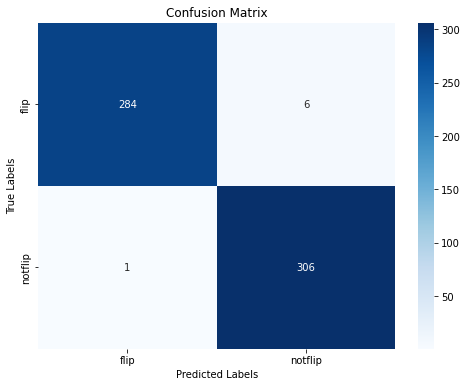

{'accuracy': 0.9882747068676717, 'f1_score': 0.9886914378029078}

In [15]:
import seaborn as sns
eval_model(EfficientNetV2B1_model, test_data)

In [28]:
efficient_net_path = '../models/efficient_net.h5'
EfficientNetV2B1_model.save(efficient_net_path)
EfficientNetV2B1_model.save(efficient_net_path)
efficient_net_size = os.path.getsize(efficient_net_path) / (1024 * 1024)
print('Model size: ', efficient_net_size, 'MB')

Model size:  35.41743469238281 MB
